# Лаба 5: Определение принадлежности текстов к заданной тематике

In [ ]:
# -*- coding: utf-8 -*-
#from __future__ import unicode_literals
import numpy as np

from bs4 import BeautifulSoup

import codecs

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn

In [107]:
from pymystem3 import Mystem
m = Mystem()

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(u'[A-Za-zА-Яа-яёЁ]+')

In [3]:
def cos_m(x,y):
    return abs(cosine_similarity(x,y)[0][0])

#TODO - generator?
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    lemms = []
    for i in tokens:
        if len(i)>2:
            lemms.append(m.lemmatize(i)[0])
    return lemms

In [146]:
#ids of texts you need to classify
ids=[3078, 1689, 2062, 1040, 2066, 3603, 1911, 2583, 24, 30, 945, 548, 2087, 1885, 2603, 1580, 45, 46, 1074, 56, 2618, 572, 3647, 3649, 3931, 70, 587, 588, 589, 1616, 3001, 1107, 2646, 1113, 1626, 1117, 2918, 612, 1639, 2668, 109, 1136, 3700, 2166, 2167, 1658, 2496, 2173, 3203, 3180, 1669, 3719, 3722, 536, 658, 2195, 2708, 3927, 2712, 2201, 1690, 3184, 1183, 1697, 3235, 1188, 2215, 174, 1054, 1201, 808, 1717, 695, 2232, 1723, 1725, 1227, 3775, 3264, 705, 1740, 2758, 3783, 712, 715, 1228, 2253, 2259, 3285, 2372, 2682, 219, 740, 1831, 2280, 3818, 748, 1747, 2799, 1406, 1270, 1273, 213, 384, 766, 1279, 2816, 1281, 913, 2313, 3800, 269, 3715, 777, 2324, 789, 3795, 2332, 1311, 1825, 290, 1827, 2343, 1586, 298, 2861, 3886, 3375, 2353, 2355, 2356, 1343, 1345, 2370, 1347, 324, 1355, 1361, 2901, 1367, 1371, 861, 3426, 2806, 356, 358, 3433, 364, 372, 375, 3454, 1920, 903, 3906, 2954, 907, 2456, 909, 910, 3566, 1937, 402, 1428, 751, 3738, 1289, 413, 2977, 1180, 2469, 2982, 1967, 2480, 1457, 441, 3318, 450, 3526, 3530, 1016, 3025, 978, 2003, 468, 562, 3544, 479, 409, 484, 2026, 2028, 2030, 496, 1524, 1013, 887, 1015, 870, 836, 511]

texts_index = list(zip(range(200), ids))

In [147]:
len(ids), len(texts_index)

(200, 200)

In [111]:
texts = []
for i in range(1,21):
    f = codecs.open('/data/lab05data/data/base_'+str(i)+'.txt', 'r', 'utf-8')
    text = f.readlines()
    texts.append(BeautifulSoup(text[0], "lxml").text.lower())
len(texts)

20

In [112]:
for i in ids:
    f = codecs.open('/data/lab05data/data/test_'+str(i)+'.txt', 'r', 'utf-8')
    text = f.readlines()
    texts.append(BeautifulSoup(text[0], "lxml").text.lower())
len(texts)

220

In [64]:
print("\n".join(texts[:5]))

ищем прекрасного программиста 1с в дружный отдел сотрудников сферы it с неутомительным режимом работы. у нас есть 1с 8.2, 8.3, бухгалтерия строительной организации, жкх, зуп + самописные. что надо делать: - доработать существующие конфигурации,- разработать новые конфигураций,- отчеты, базы данных...- осуществлять поддержку наших продвинутых пользователей режим работы с 10 до 18 по вторникам и пятницам (строго!).  
предлагаем уникальную возможность присоединиться к команде, разрабатывающей и выпускающей следующее поколение корпоративных антивирусных продуктов. вам будет отведена важная роль в разработке как основного продукта так и смежных инфраструктурных проектов и кастомизиций.   чем придется заниматься:   участие в разработке основной линейки антивирусных продуктов лаборатории касперского   работа в ключевой команде опытных разработчиков лк     что нужно знать и уметь:   отличное знание c# и .net framework.   отличное знание c++ и опыт практического использования (win32).   пониман

In [113]:
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", 
              "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", 
              "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за",
              "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", 
              "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг",
              "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять",
              "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по",
              "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек",
              "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил",
              "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно",
              "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом",
              "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец",
              "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]

In [114]:

tfidf_vec = TfidfVectorizer(norm=None, 
                            smooth_idf=False, 
                            token_pattern=u'[A-Za-zА-Яа-яёЁ]+', 
                            stop_words=stop_words)
m_tfidf = tfidf_vec.fit_transform(texts)
matrix_tfidf = m_tfidf.toarray()

In [115]:
m_tfidf.shape

(220, 6605)

In [35]:
m_tfidf.todense()[0].shape

(1, 6605)

In [116]:
%%time
y = []
for i in matrix_tfidf[20:]:
    s = 0
    for j in matrix_tfidf[:20]:
        s += cos_m(j.reshape(-1, 1), i.reshape(-1, 1))  
    y.append( s )

CPU times: user 2h 2min 7s, sys: 6h 28min 48s, total: 8h 30min 55s
Wall time: 17min 28s


In [125]:
from joblib import Parallel, delayed

def cosine_p(i):
    s = 0
    for j in range(0,20):
        s += cos_m(matrix_tfidf[j].reshape(-1, 1), matrix_tfidf[i].reshape(-1, 1))  
    return s

In [126]:
%%time
results = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(
             map(delayed(cosine_p), range(20,len(matrix_tfidf)))
)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.1 µs


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.4min finished


In [117]:
matrix_tfidf

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [18.40747231,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [119]:
len(matrix_tfidf)

220

In [ ]:
from numba import jit
from numpy import arange

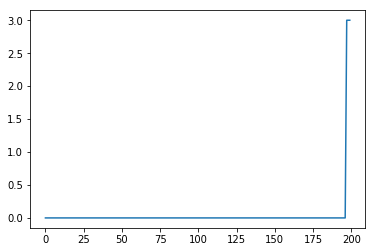

In [127]:
plt.plot(sorted(results))

In [42]:
%%time
from scipy.spatial.distance import pdist
y_cosine = pdist(matrix_tfidf, metric='cosine')

CPU times: user 282 ms, sys: 0 ns, total: 282 ms
Wall time: 341 ms


In [43]:
y_cosine

array([0.9981821 , 0.99571929, 0.96855195, ..., 0.97834534, 0.99072965,
       0.97093302])

In [41]:
import numpy as np
#y_np = np.sum(cosine_similarity(matrix_tfidf[None,:], matrix_tfidf[:, None]), -1)

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

In [14]:
matrix_tfidf.shape

(420, 6605)

In [18]:
len(y)

400

In [30]:
y_cosine.shape

(87990,)

In [31]:
y_cosine

array([0.9981821 , 0.99571929, 0.96855195, ..., 0.97834534, 0.99072965,
       0.97093302])

In [21]:
y

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [68]:
from sklearn.metrics.pairwise import pairwise_distances

In [129]:
%%time
d = pairwise_distances(matrix_tfidf, metric='cosine')

CPU times: user 1.41 ms, sys: 38.7 ms, total: 40.1 ms
Wall time: 39.2 ms


In [131]:
d.shape

(220, 220)

In [139]:
#отсортировать
1 - abs(d[20:,20:])

array([[1.        , 0.09943672, 0.09212314, ..., 0.01653624, 0.06625641,
        0.03008297],
       [0.09943672, 1.        , 0.10812431, ..., 0.0233162 , 0.07178526,
        0.04281089],
       [0.09212314, 0.10812431, 1.        , ..., 0.04088049, 0.10697972,
        0.03314048],
       ...,
       [0.01653624, 0.0233162 , 0.04088049, ..., 1.        , 0.0219725 ,
        0.00939713],
       [0.06625641, 0.07178526, 0.10697972, ..., 0.0219725 , 1.        ,
        0.02958395],
       [0.03008297, 0.04281089, 0.03314048, ..., 0.00939713, 0.02958395,
        1.        ]])

In [134]:
y = list(1 - d[0][20:])

"Так как текстов заданной тематики несколько, результирующую метрику на неизвестный текст можно получить путем сложения косинусной меры этого текста со всеми эталонными текстами. При этом сумма косинусных мер может оказаться больше единицы."

In [140]:
d20=1 - abs(d[:20][:])

In [141]:
d20.shape

(20, 220)

In [142]:
y=list(d20.sum(axis=0)[20:])

In [ ]:
tfidf_vec = TfidfVectorizer(norm=None, 
                            smooth_idf=False, 
                            tokenizer=tokenize, 
                            stop_words=stop_words)
matrix_tfidf = tfidf_vec.fit_transform(texts).toarray()
y = []
for i in matrix_tfidf[20:]:
    s = 0
    for j in matrix_tfidf[:20]:
        s += cos_m(j.reshape(-1, 1), i.reshape(-1, 1))  
    y.append( s )

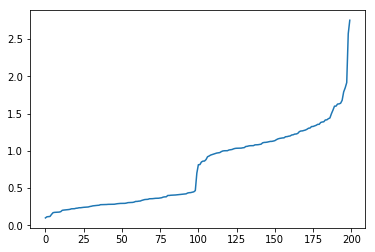

In [143]:
plt.plot(sorted(y))

In [144]:
print(len(y))
print(sum(y))
print(matrix_tfidf.shape)

200
151.92491865588863
(220, 6605)


In [145]:
average = sum(y)/200
print(average)

0.7596245932794432


In [106]:
json = {
    'defined': [],
    'other': []
}

for i in y:
    if i > average:
        json['defined'].append(texts_index[y.index(i)][1])
    else:
        json['other'].append(texts_index[y.index(i)][1])
print(json)

{'defined': [1111, 522, 3084, 2968, 2588, 2603, 1580, 52, 2101, 63, 587, 588, 1115, 2066, 2668, 2067, 3183, 3184, 133, 196, 3927, 538, 668, 2206, 1200, 177, 1717, 3264, 1218, 710, 3783, 1740, 2224, 548, 724, 2682, 3925, 1806, 3180, 1273, 213, 1323, 1798, 1289, 3850, 2323, 3352, 1669, 290, 1827, 1320, 2696, 301, 2357, 311, 1343, 1345, 2370, 2374, 1166, 3300, 2389, 859, 352, 3939, 658, 880, 1394, 1396, 1911, 377, 384, 897, 903, 3473, 1689, 1860, 917, 2456, 3481, 2973, 414, 2467, 1961, 3827, 2480, 945, 1469, 758, 3526, 3025, 1344, 1500, 2526, 3551, 665, 3564, 2901, 2200, 1024], 'other': [2561, 4, 5, 3090, 3343, 534, 2583, 536, 2565, 2591, 2084, 2606, 1072, 1074, 572, 2622, 2624, 3649, 1602, 78, 1294, 3154, 2134, 599, 89, 1632, 2148, 1125, 701, 1137, 2167, 1658, 3708, 1152, 3713, 2692, 2184, 3214, 3730, 3222, 2201, 161, 680, 176, 2228, 2744, 3468, 2238, 3775, 3268, 712, 1747, 3285, 3804, 1404, 2855, 2259, 1779, 3317, 3318, 1281, 812, 2316, 3854, 783, 3886, 3357, 1825, 2343, 299, 814, 2353,

In [86]:
print(texts[[i[1] for i in texts_index].index(2561) + 20])

мы ищем талантливых и целеустремленных специалистов для работы в санкт-петербургском центре разработок. вам предстоит:  разрабатывать и сопровождать систему автоматической установки и конфигурирования программных сред. проектировать архитектуру, выбирать программные средства. работать с отделами разработки, тестирования и администрирования: сбор требований, расширение функционала системы, выпуск новых версий.    наши ожидания:  опыт разработки программного обеспечения от 5-ти лет. опыт разработки back-end систем на python. опыт разработки web-интерфейсов с использованием html, js, css, python, django. опыт работы с субд: postgresql. владение объектно-ориентированной методологией, шаблонами проектирования (ood patterns). опыт разработки high availability систем. english - intermediate.    мы предлагаем:  индексируемую заработную плату. 100% оплату больничного. отпуск 28 календарных дней, оплачиваемый 100% в соответствии с текущей ставкой. медицинское сопровождение (дмс, офисный врач, ст